# Import Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np 
import keras as k
import matplotlib.pyplot as plt

from plotnine import *
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from keras import models
from keras import optimizers
from keras import layers
from keras import losses
from keras import metrics

from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

## Sources
* https://mljar.com/blog/feature-importance-in-random-forest/

# Data Shape

In [5]:
data = pd.read_csv("/Users/jacksonthomas/Desktop/Baseball Projects/Datasets/pitchingDataClean.csv")

In [ ]:
data.shape

In [ ]:
data.head()

In [ ]:
data.columns

# Data Cleaning + Modifications

In [6]:
dataFB = data.loc[data["Four-Seam"] == 1]
dataFB.columns
# dataFB.dropna(inplace = True)

Index(['Unnamed: 0', 'Pitcher', 'PitcherId', 'PitcherTeam', 'RelSpeed',
       'VertRelAngle', 'HorzRelAngle', 'SpinRate', 'SpinAxis', 'RelHeight',
       'RelSide', 'Extension', 'VertBreak', 'InducedVertBreak', 'HorzBreak',
       'PlateLocHeight', 'PlateLocSide', 'VertApprAngle', 'HorzApprAngle',
       'ExitSpeed', 'Angle', 'pfxx', 'pfxz', 'HardHit', 'Swing', 'Contact',
       'InKZone', 'OutKZone', 'Left', 'Right', 'Bunt', 'FlyBall', 'GroundBall',
       'LineDrive', 'PopUp', 'Double', 'Error', 'FieldersChoice', 'HomeRun',
       'NotInPlay', 'Out', 'Sacrifice', 'Single', 'Triple', 'Changeup',
       'Curveball', 'Cutter', 'Four-Seam', 'Sinker', 'Slider', 'Splitter',
       'BallCalled', 'FoulBall', 'HitByPitch', 'InPlay', 'StrikeCalled',
       'StrikeSwinging', 'Balls_0', 'Balls_1', 'Balls_2', 'Balls_3',
       'Strikes_0', 'Strikes_1', 'Strikes_2', 'Outs_0', 'Outs_1', 'Outs_2',
       'Outs_3'],
      dtype='object')

In [ ]:
features = ['Pitcher', 'PitcherId', 'RelSpeed','VertRelAngle', 'HorzRelAngle', 'RelHeight','RelSide', 
            'Extension', 'VertApprAngle', 'HorzApprAngle', 'SpinAxis', 'SpinRate', 'InducedVertBreak']

predictors = ['RelSpeed','VertRelAngle', 'HorzRelAngle', 'RelHeight','RelSide', 
            'Extension', 'VertApprAngle', 'HorzApprAngle', 'SpinAxis', 'SpinRate']

dataFB = dataFB[features]

z = StandardScaler()
dataFB[predictors] = z.fit_transform(dataFB[predictors])

dataFB.head()
dataFB.columns

dataFB.shape

In [8]:
dataFB.isna().sum()
dataFB.dropna(inplace = True)
dataFB.shape

(272182, 13)

# Preprocessing

In [9]:
#assigning predictors
xPred = dataFB[predictors]

#setting y 
yClass = dataFB['InducedVertBreak']

#split into TT sets
x_train, x_test, y_train, y_test = train_test_split(xPred, yClass, 
                                                    test_size = 0.2, 
                                                    random_state = 11)

# Random Forest 

In [10]:
rf = RandomForestRegressor(n_estimators=100) # 100 trees
rf.fit(x_train, y_train)

RandomForestRegressor()

### Feature Importance

In [11]:
predictorsArr = np.array(predictors)

Text(0.5, 1.0, 'Feature Importance')

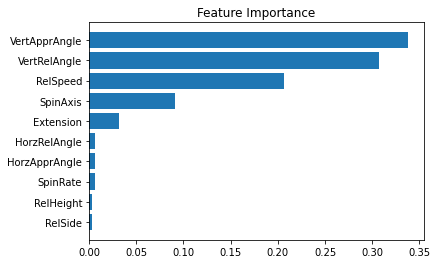

In [12]:
sorted_idx = rf.feature_importances_.argsort()

plt.barh(predictorsArr[sorted_idx], rf.feature_importances_[sorted_idx])
plt.title("Feature Importance")

### Revision

In [13]:
predictors = ['RelSpeed','VertRelAngle', 'VertApprAngle']

#assigning predictors
xPred = dataFB[predictors]

#setting y 
yClass = dataFB['InducedVertBreak']

#split into TT sets
x_train, x_test, y_train, y_test = train_test_split(xPred, yClass, 
                                                    test_size = 0.2, 
                                                    random_state = 11)

In [14]:
rf = RandomForestRegressor(n_estimators=100) # 100 trees
rf.fit(x_train, y_train)

RandomForestRegressor()

In [16]:
y_pred = rf.predict(x_test)

In [17]:
print("Accuracy:",metrics.rmse(y_test, y_pred))

AttributeError: module 'keras.metrics' has no attribute 'rmse'

# Neural Network